<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/Applications/2-Markov_Chains/Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Markov Chains


---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/app-mc.html). A copy of the prompt along with the completed exercise can be found under [/Applications](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/Applications).

## Summary

Every day for lunch you have either a \\$9 sandwich (state 1), a \\$7 burrito (state 2), or a \\$5 pizza (state 3). Suppose your lunch choices from one day to the next follow a Markov chain with transition matrix. You start out with eating pizza on Monday (Day 0).

$$
\mathbf{P} =
\begin{bmatrix}
0 & 0.5 & 0.5\\
0.1 & 0.4 & 0.5\\
0.2 & 0.3 & 0.5
\end{bmatrix}
$$

$T$ = the first day you have a sandwich.

$V$ = the number of days you have a burrito this five-day work week.

$X_n$ = the cost of your lunch on day $n$.

$W = X_0 + \cdots + X_4$ = the total lunch cost for this five-day work week.

---

## Application

In [1]:
pip install symbulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.7 MB/s eta 0:00:00


In [2]:
from symbulate import *
%matplotlib inline

###1.

Approximate the marginal distribution, along with the expected value and standard deviation, of each of the following:
$$X_4 \qquad T \qquad V \qquad W$$

In [68]:
#Set up markov chain
states = [9, 7, 5]

TransitionMatrix = [[0, 0.5, 0.5],
                   [0.1, 0.4, 0.5],
                   [0.2, 0.3, 0.5]]

InitialDistribution = [0, 0, 1] # pizza on the Monday

L = MarkovChain(TransitionMatrix, InitialDistribution)
X = MarkovChain(TransitionMatrix, InitialDistribution, states)

#define any other simulation parameters
n_sims = 10000
days_in_week = 5 # Friday is day 4

$X_4$

In [35]:
#run simulation and generate results
results = X[4].sim(10000)
results.tabulate()

5,5040
7,3564
9,1396
Total,10000


In [36]:
results.tabulate(normalize=True)

5,0.504
7,0.3564
9,0.1396
Total,1.0


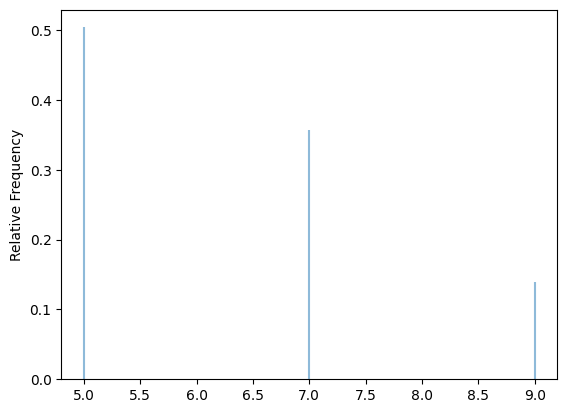

In [45]:
results.plot()

From the plot we can see the distribution of the cost of lunch on Friday. Half the time we are spending \$5 on pizza , while closly behind that we are spending \$7 on burritos. It is every so often that we splurge on a \$9 sandwitch.

In [44]:
#calculate and present expected value
ev = results.mean()

print("The expected value is ${:.2f}".format(ev))

The expected value is $6.27


In [43]:
#calculate and present standard deviation
std_dev = results.std()

print("The standard deviation is ${:.2f}".format(std_dev))

The standard deviation is $1.43


$T$

In [58]:
#run simulations and generate results
results = L.sim(10000)
results

0,"(2, 2, 1, 0, 2, 0, ...)"
1,"(2, 2, 0, 2, 2, 1, ...)"
2,"(2, 2, 2, 2, 1, 2, ...)"
3,"(2, 2, 1, 2, 2, 2, ...)"
4,"(2, 1, 2, 1, 2, 1, ...)"
5,"(2, 2, 2, 0, 1, 2, ...)"
6,"(2, 0, 2, 2, 0, 1, ...)"
7,"(2, 0, 2, 2, 1, 1, ...)"
8,"(2, 2, 2, 0, 2, 2, ...)"
...,...
9999,"(2, 2, 0, 2, 2, 2, ...)"


In [60]:
def first_sando(x):
  day = 1;
  while(x[day] != 0):
    day += 1
  return day

T = results.apply(first_sando)
T.tabulate()

1,2016
2,1310
3,1057
4,908
5,787
6,591
7,486
8,423
9,397
10,323
11,286


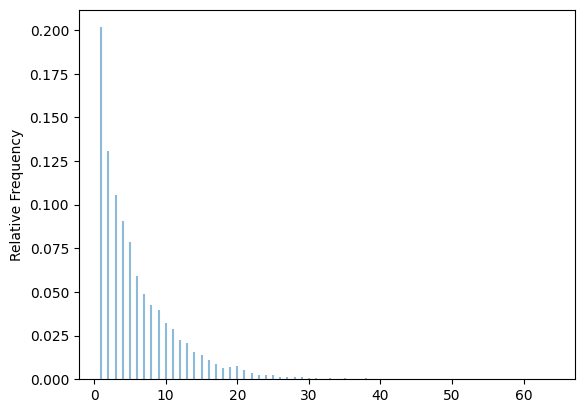

In [61]:
T.plot()

From this plot we can see that the distribution of first sandwitch day is skewed. We are very likey to have a sandwitch within the first few days, but it is possible to go a few weeks without having the first one.

In [64]:
#calculate and present expected value
ev = T.mean()

print("The expected value is {:.2f} days".format(ev))

The expected value is 6.01 days


In [65]:
#calculate and present standard deviation
std_dev = T.std()

print("The standard deviation is {:.2f} days".format(std_dev))

The standard deviation is 5.79 days


$V$

In [70]:
def burrito_count(x):
  count = 0
  for day in range(1,days_in_week):
    if x[day] == 1:
      count +=1

  return count

V = results.apply(burrito_count)
V.tabulate()

0,1917
1,3758
2,2952
3,1170
4,203
Total,10000


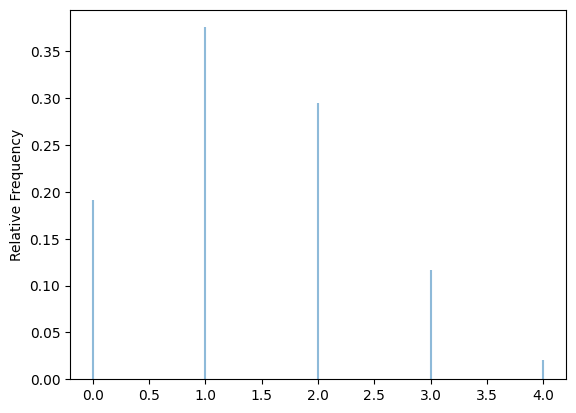

In [71]:
V.plot()

This plot of our burrito count distribution is showing how it is likely we will have at least 1 or 2 burritos in this week but less likely we will have all burritos after one day of pizza or no burritos at all.

In [72]:
#calculate and present expected value
ev = V.mean()

print("The expected value is {:.2f} burritos".format(ev))

The expected value is 1.40 burritos


In [73]:
#calculate and present standard deviation
std_dev = V.std()

print("The standard deviation is {:.2f} burritos".format(std_dev))

The standard deviation is 0.99 burritos


$W$

In [78]:
W = (X[0] + X[1] + X[2] + X[3] + X[4]).sim(10000)
W.tabulate()

25,646
27,1472
29,2598
31,2733
33,1776
35,669
37,106
Total,10000


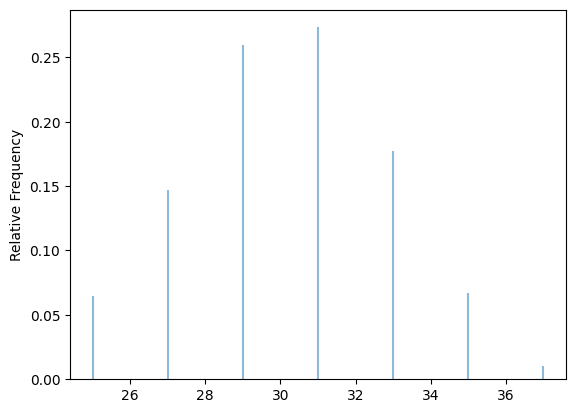

In [79]:
W.plot()

This distribution shows how the cost of lunches this week is likely to hover around \$29-\$39.

In [80]:
#calculate and present expected value
ev = W.mean()

print("The expected value is ${:.2f} for lunch this week".format(ev))

The expected value is $30.19 for lunch this week


In [82]:
#calculate and present standard deviation
std_dev = W.std()

print("The standard deviation is ${:.2f} for lunch this week".format(std_dev))

The standard deviation is $2.69 for lunch this week


###2.

Approximate the joint distribution, along with the correlation, of each of the following:
$$X_4 \text{ and } X_5$$
$$T \text{ and } V$$
$$T \text{ and } W$$
$$W \text{ and } V$$


$X_4$ and $X_5$

$T$ and $V$

$T$ and $W$

$W$ and $V$

###3.

Approximate the conditional distribution of $V$ given $T=4$, along with its (conditional) mean and standard deviation.

$V$

$\mu$

$\sigma$

###4.

Your choice. Choose at least one other joint, conditional, or marginal distribution to investigate. You can work with $X_n, T, V, W$, but you are also welcome to define other random variables in this context. You can also look at time frames other than a single week.